<a href="https://colab.research.google.com/github/chandrikap27/Python-basics-/blob/main/hamvsspam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [20]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [21]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [22]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df.rename(columns={'v1':'label','v2':'message'},inplace=True)

In [24]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [26]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [27]:
df['spam']=df['label'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,label,message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [28]:
df['length']=df['message'].apply(len)
df.head()

,label,message,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

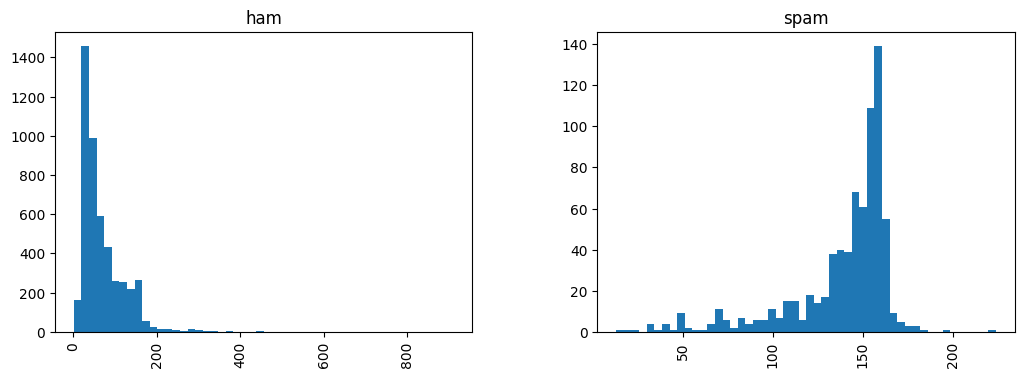

In [29]:
df.hist(column='length',by='label',bins=50,figsize=(12,4))

Preprocessing Data

In [30]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
def remove_punc_stopwords(message):
    no_punc=[char for char in message if char not in string.punctuation]
    no_punc=''.join(no_punc)
    no_punc=[word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
    return no_punc

In [34]:
df['message'].apply(remove_punc_stopwords).head()

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [35]:
#bow 
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=remove_punc_stopwords).fit(df['message'])

In [36]:
print(len(bow_transformer.vocabulary_))

11304


In [37]:
sample=df['message'][3]
bow_sample=bow_transformer.transform([sample])
print(sample)
print(bow_sample)

U dun say so early hor... U c already then say...
  (0, 3996)	2
  (0, 4551)	1
  (0, 5179)	1
  (0, 6118)	1
  (0, 6136)	1
  (0, 7091)	1
  (0, 9445)	2


In [38]:
bow_data=bow_transformer.transform(df['message'])

In [39]:
bow_data.shape

(5572, 11304)

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(bow_data)

In [41]:
tfidf_data=tfidf_transformer.transform(bow_data)
print(tfidf_data)

  (0, 11043)	0.2302307806673824
  (0, 10845)	0.19070440364977176
  (0, 8809)	0.24700781968848798
  (0, 8231)	0.17135863098645995
  (0, 7567)	0.263992475219973
  (0, 7456)	0.31248959807463006
  (0, 6846)	0.18344049775392818
  (0, 6815)	0.15156099829325625
  (0, 6131)	0.18912594285931972
  (0, 5685)	0.2498079760885523
  (0, 5136)	0.26866384122613163
  (0, 5135)	0.2983050989432094
  (0, 4574)	0.31248959807463006
  (0, 2027)	0.24200168290449323
  (0, 1461)	0.31248959807463006
  (0, 1096)	0.28824103664730155
  (1, 10952)	0.4005697292204744
  (1, 10582)	0.20689436953946386
  (1, 8482)	0.504282830397047
  (1, 7600)	0.37669696082530857
  (1, 3012)	0.29116619142344646
  (1, 2407)	0.5619244500186726
  (2, 11003)	0.1909725859033143
  (2, 10964)	0.15964606600812142
  (2, 10570)	0.1399031851067661
  :	:
  (5568, 6791)	0.31367469776242124
  (5568, 6604)	0.47781076401785183
  (5568, 6267)	0.5575721048646767
  (5568, 4801)	0.3853122086093004
  (5569, 10087)	0.520467167163554
  (5569, 8147)	0.432829970

In [42]:
tfidf_data.shape

(5572, 11304)

In [43]:
from sklearn.model_selection import train_test_split
data_bow_train,data_bow_test,label_bow_train,label_bow_test=train_test_split(bow_data,df['spam'],test_size=0.3,random_state=101)


In [44]:
data_bow_train

<3900x11304 sparse matrix of type '<class 'numpy.int64'>'
	with 35497 stored elements in Compressed Sparse Row format>

In [45]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB().fit(data_bow_train,label_bow_train)
predictions=spam_detect_model.predict(data_bow_test)


In [46]:
accuracy=spam_detect_model.score(data_bow_test,label_bow_test)
accuracy

0.9629186602870813

In [47]:
from sklearn.model_selection import train_test_split
data_tfidf_train,data_tfidf_test,label_tfidf_train,label_tfidf_test=train_test_split(tfidf_data,df['spam'],test_size=0.3,random_state=101)

In [48]:
data_tfidf_train

<3900x11304 sparse matrix of type '<class 'numpy.float64'>'
	with 35497 stored elements in Compressed Sparse Row format>

In [49]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB().fit(data_tfidf_train,label_tfidf_train)
predictions=spam_detect_model.predict(data_tfidf_test)
predictions

array([1, 0, 0, ..., 1, 0, 0])

In [50]:
accuracy=spam_detect_model.score(data_tfidf_test,label_tfidf_test)
accuracy

0.9635167464114832